# Advent of Code 2021 edition -Days 1 to 5-

In [47]:
# necessary imports
from pathlib import Path
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
ROOT_DIR = Path().resolve().parents[3]
DATA_DIR = ROOT_DIR / "data" / "2021"

DATA_DIR

WindowsPath('C:/Users/User/Documents/Projects/advent-code/data/2021')

# --- Day 1: Sonar Sweep ---

In [12]:
def load_data_day_1() -> List[int]:
    day_one_file = DATA_DIR / "day1"
    with open(day_one_file, "r") as f:
        return [int(line) for line in f.readlines()]
    
report = load_data_day_1()
print(report[:5])
np_report = np.array(report)
print(np_report.shape)

[118, 121, 123, 125, 134]
(2000,)


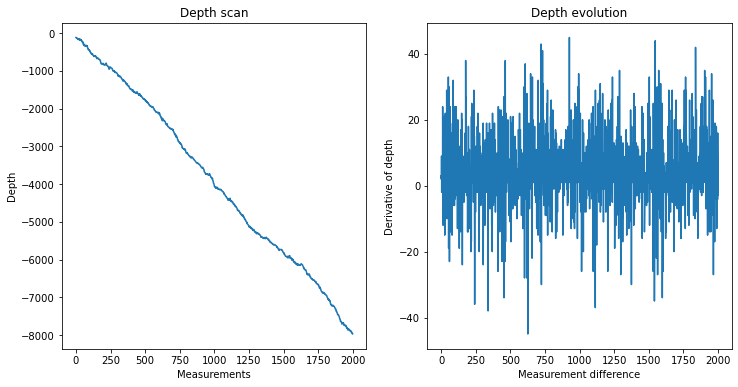

In [30]:
# Increase visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(-np_report)
ax2.plot(np_report[1:] - np_report[:-1])

ax1.set_title("Depth scan")
ax1.set_xlabel("Measurements")
ax1.set_ylabel("Depth")

ax2.set_title("Depth evolution")
ax2.set_xlabel("Measurement difference")
ax2.set_ylabel("Derivative of depth")

plt.show()

## Too much noise !

Using a measurement window of 3, we might reduce the noise.

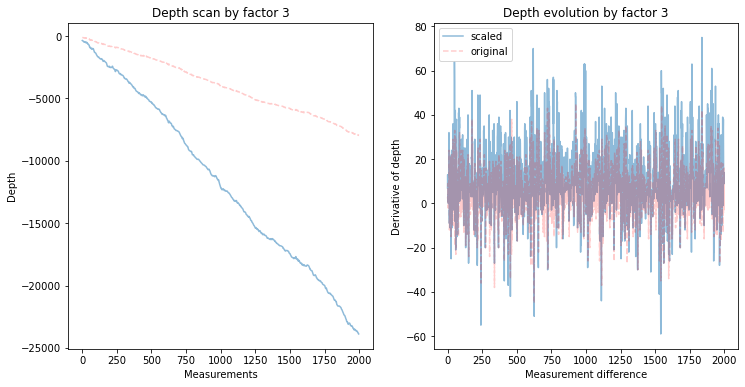

In [45]:
measurement_three = np_report[:-2] + np_report[1:-1] + np_report[2:]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(-measurement_three, alpha=0.5, label="scaled")
ax1.plot(-np_report, 'r--', alpha=0.2, label="original")

ax2.plot(measurement_three[1:] - measurement_three[:-1], alpha=0.5, label="scaled")
ax2.plot(np_report[1:] - np_report[:-1], 'r--', alpha=0.2, label="original")

ax1.set_title("Depth scan by factor 3")
ax1.set_xlabel("Measurements")
ax1.set_ylabel("Depth")

ax2.set_title("Depth evolution by factor 3")
ax2.set_xlabel("Measurement difference")
ax2.set_ylabel("Derivative of depth")

plt.legend()
plt.show()

# --- Day 2: Dive! ---

In [65]:
def load_data_day_2() -> List[Tuple[str, int]]:
    day_two_file = DATA_DIR / "day2"
    with open(day_two_file, "r") as f:
        return [(line.split()[0], int(line.split()[1])) for line in f.readlines()]

planned_course = load_data_day_2()
print(planned_course[:5])

[('forward', 6), ('down', 8), ('down', 5), ('down', 9), ('forward', 2)]


In [66]:
# prepare array
trajectory = np.zeros((len(planned_course) + 1, 2))

print(trajectory.shape)

# set algorithm
for idx_inst, instruction in enumerate(planned_course):
    direction, units = instruction
    x, y = trajectory[idx_inst]
    if direction == "forward":
        trajectory[idx_inst + 1] = [x + units, y]
    elif direction == "down":
        trajectory[idx_inst + 1] = [x, y + units]
    elif direction == "up":
        trajectory[idx_inst + 1] = [x, y - units]

(1001, 2)


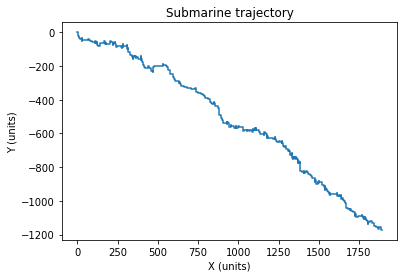

In [67]:
fig, ax = plt.subplots()

ax.plot(trajectory[:,0], -trajectory[:,1])
ax.set_ylabel("Y (units)")
ax.set_xlabel("X (units)")
ax.set_title("Submarine trajectory")

plt.show()

## Adding aim to our course

In [68]:
# prepare array
trajectory_aim = np.zeros((len(planned_course) + 1, 3))

print(trajectory_aim.shape)

for idx_inst, instruction in enumerate(planned_course):
    direction, units = instruction
    x, y, aim = trajectory_aim[idx_inst]
    if direction == "forward":
        trajectory_aim[idx_inst + 1] = [x + units, y + (units * aim), aim]
    elif direction == "down":
        trajectory_aim[idx_inst + 1] = [x, y, aim + units]
    elif direction == "up":
        trajectory_aim[idx_inst + 1] = [x, y, aim - units]

(1001, 3)


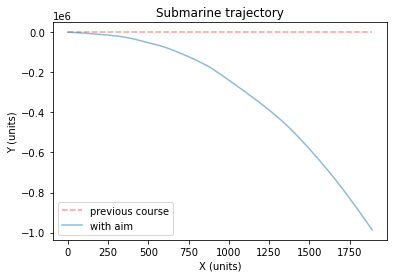

In [70]:
fig, ax = plt.subplots()

ax.plot(trajectory[:,0], -trajectory[:,1], "r--", alpha=0.4, label="previous course")
ax.plot(trajectory_aim[:,0], -trajectory_aim[:,1], alpha=0.5, label="with aim")
ax.set_ylabel("Y (units)")
ax.set_xlabel("X (units)")
ax.set_title("Submarine trajectory")

plt.legend()
plt.show()

# --- Day 3: Binary Diagnostic ---

In [72]:
def load_data_day_3() -> List[str]:
    day_three_file = DATA_DIR / "day3"
    with open(day_three_file, "r") as f:
        return f.read().splitlines()
    
diagnostic_report = load_data_day_3()
print(diagnostic_report[:5])

['011110111110', '110111000111', '001000001010', '000101111101', '101011011110']


In [73]:
# conversion in numpy array
diagnostic_arr = np.array([[int(letter) for letter in bin_rep]for bin_rep in diagnostic_report])

diagnostic_arr.shape

(1000, 12)

In [82]:
gamma_rate = int("".join([str(el) for el in (diagnostic_arr.mean(axis=0) > 0.5).astype('int').tolist()]), 2)
epsilon_rate = int("".join([str(el) for el in (diagnostic_arr.mean(axis=0) < 0.5).astype('int').tolist()]), 2)

print("Power consumption:", gamma_rate * epsilon_rate)

Power consumption: 852500


## Finding the life support rating

This is going to be an iterative process as we must single out every combination till there's only one left.

In [97]:
oxygen_generator_rating = 0
co2_scrubber_rating = 0
temp_diag = diagnostic_arr[:]

for i in range(diagnostic_arr.shape[1]):
    if temp_diag[:,i].mean() >= 0.5:
        temp_diag = temp_diag[temp_diag[:,i] == 1]
    else:
        temp_diag = temp_diag[temp_diag[:,i] == 0]
        
    if temp_diag.shape[0] == 1:
        oxygen_generator_rating = int("".join([str(el) for el in temp_diag[0].tolist()]), 2)
        break
        
temp_diag = diagnostic_arr[:]

for i in range(diagnostic_arr.shape[1]):
    if temp_diag[:,i].mean() < 0.5:
        temp_diag = temp_diag[temp_diag[:,i] == 1]
    else:
        temp_diag = temp_diag[temp_diag[:,i] == 0]
        
    if temp_diag.shape[0] == 1:
        co2_scrubber_rating = int("".join([str(el) for el in temp_diag[0].tolist()]), 2)
        break
        
print("Life support rating:", oxygen_generator_rating * co2_scrubber_rating)

Life support rating: 1007985


# --- Day 4: Giant Squid ---

We can read data as a N-bingos x 5 x 5 numpy array of numbers here.

In [165]:
def load_data_day_4() -> Tuple[np.ndarray, np.ndarray]:
    """Loads data as a N x 5 x 5 numpy array

    Returns
    -------
    Tuple[np.ndarray, np.ndarray]
        List of drawn numbers and bingo boards
    """
    day_four_file = DATA_DIR / "day4"
    bingo_boards = bingo_board = []
    with open(day_four_file, "r") as f:
        numbers_to_draw = [int(num) for num in f.readline().split(",")]
        while True:
            current_line = f.readline()
            if not current_line:
                break

            current_line = current_line.strip()
            if current_line:
                bingo_board.append([int(num) for num in current_line.split()])
            else:
                if bingo_board:
                    bingo_boards.append(bingo_board)
                bingo_board = []

    return np.array(numbers_to_draw), np.array(bingo_boards)

numbers_to_draw, bingo_boards = load_data_day_4()
print(numbers_to_draw)
print(numbers_to_draw.shape, bingo_boards.shape)

checked = np.ones(bingo_boards.shape)
print(checked.shape)

[46 12 57 37 14 78 31 71 87 52 64 97 10 35 54 36 27 84 80 94 99 22  0 11
 30 44 86 59 66  7 90 21 51 53 92  8 76 41 39 77 42 88 29 24 60 17 68 13
 79 67 50 82 25 61 20 16  6  3 81 19 85  9 28 56 75 96  2 26  1 62 33 63
 32 73 18 48 43 65 98  5 91 69 47  4 38 23 49 34 55 83 93 45 72 95 40 15
 58 74 70 89]
(100,) (99, 5, 5)
(99, 5, 5)


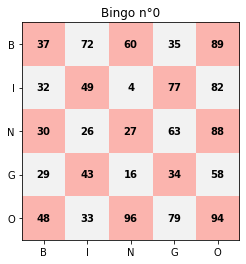

In [166]:
from matplotlib.patches import Wedge
bingo_ticks = ['B', 'I', 'N', 'G', 'O']

def plot_bingo_card(bingo_idx):
    bingo_card = bingo_boards[bingo_idx]
    checked_card = checked[bingo_idx]
    
    bg_img = np.zeros(bingo_card.shape)
    bg_img = bg_img.flatten()
    bg_img[1::2] = 1
    bg_img = bg_img.reshape(5,5)
    
    fig, ax = plt.subplots()
    ax.imshow(bg_img, cmap="Pastel1")
    
    # Fancy ticks
    ax.set_xticks(np.arange(len(bingo_ticks)), labels=bingo_ticks)
    ax.set_yticks(np.arange(len(bingo_ticks)), labels=bingo_ticks)
    
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, bingo_card[i, j],
                           ha="center", va="center", color="k", fontweight="bold")
    
    # Now, loop through coord arrays, and create a circle at each x,y pair
    for (xx, yy) in np.argwhere(checked_card == 0):
        circ = Wedge((xx, yy), .4, 0, 360, width=0.05, color='red')
        ax.add_patch(circ)
    
    ax.set_title(f"Bingo n°{bingo_idx}")
    
    plt.show()
    
plot_bingo_card(0)

Now we have to find the first card that won the bingo.

Winning number is: 80


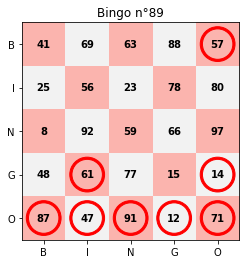

Total unchecked sum: 929.0 / total score: 74320.0


In [167]:
winning_number = 0
winning_row_num = 0

for number in numbers_to_draw:
    checked[bingo_boards == number] = 0
    if np.argwhere(checked.sum(axis=1) == 0).size != 0:
        row, _ = np.argwhere(checked.sum(axis=1) == 0)[0]
        winning_number = number
        winning_row_num = row
        break
    elif np.argwhere(checked.sum(axis=2) == 0).size != 0:
        row, _ = np.argwhere(checked.sum(axis=2) == 0)[0]
        winning_number = number
        winning_row_num = row
        break
        
print("Winning number is:", winning_number)
plot_bingo_card(winning_row_num)    
total_unchecked_sum = (bingo_boards[winning_row_num] * checked[winning_row_num]).sum()
print("Total unchecked sum:", total_unchecked_sum, "/ total score:", total_unchecked_sum * winning_number)

## Let the squid win last

Last winning number is: 34


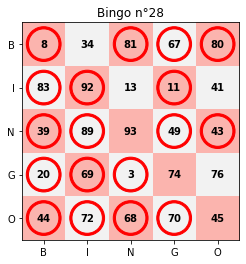

Total unchecked sum: 526.0 / total score: 42080.0


In [184]:
checked = np.ones(bingo_boards.shape)

last_number = -1
last_row_num = -1
winning_board_idxs = []

for number in numbers_to_draw:
    checked[bingo_boards == number] = 0
    
    rows = np.unique(np.argwhere(checked.sum(axis=1) == 0)[:, 0])
    for row in rows:
        if row not in winning_board_idxs: winning_board_idxs.append(row)
            
    rows = np.unique(np.argwhere(checked.sum(axis=2) == 0)[:, 0])
    for row in rows:
        if row not in winning_board_idxs: winning_board_idxs.append(row)
        
    if len(winning_board_idxs) == bingo_boards.shape[0]:
        last_row_num = winning_board_idxs[-1]
        last_number = number
        break
        
print("Last winning number is:", last_number)
plot_bingo_card(last_row_num)    
total_unchecked_sum = (bingo_boards[last_row_num] * checked[last_row_num]).sum()
print("Total unchecked sum:", total_unchecked_sum, "/ total score:", total_unchecked_sum * winning_number)


# --- Day 5: Hydrothermal Venture ---

In [215]:
def load_data_day_5() -> Tuple[List[Tuple[int, ...]], List[Tuple[int, ...]]]:
    day_five_file = DATA_DIR / "day5"
    start_points = [] 
    end_points = []
    with open(day_five_file, "r") as f:
        for line in f.readlines():
            start_point, end_point = [el.strip() for el in line.split("->")]
            start_points.append([int(coord) for coord in start_point.split(",")])
            end_points.append([int(coord) for coord in end_point.split(",")])

    return np.array(start_points), np.array(end_points)

start_points, end_points = load_data_day_5()

print(start_points.shape, end_points.shape)
print(start_points[:5], '\n', end_points[:5])

(500, 2) (500, 2)
[[593  10]
 [777 236]
 [650 575]
 [120 612]
 [508 707]] 
 [[593  98]
 [964 236]
 [476 575]
 [715  17]
 [508  89]]


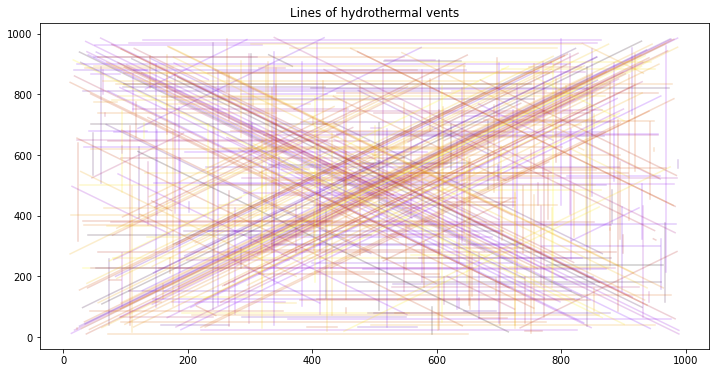

In [233]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


n_segments, _ = start_points.shape
cmap = cm.get_cmap('gnuplot', n_segments)

if isinstance(cmap, LinearSegmentedColormap):
    list_colors = cmap(range(500))
elif isinstance(cmap, ListedColormap):
    list_colors = cmap.colors

fig, ax = plt.subplots(figsize=(12, 6))

for n_segment in range(n_segments):
    x1, y1 = start_points[n_segment]
    x2, y2 = end_points[n_segment]
    ax.plot([x1, x2], [y1, y2], color=list_colors[n_segment], alpha = 0.2)
    
ax.set_title("Lines of hydrothermal vents")    

plt.show()

If we only consider horizontal lines...

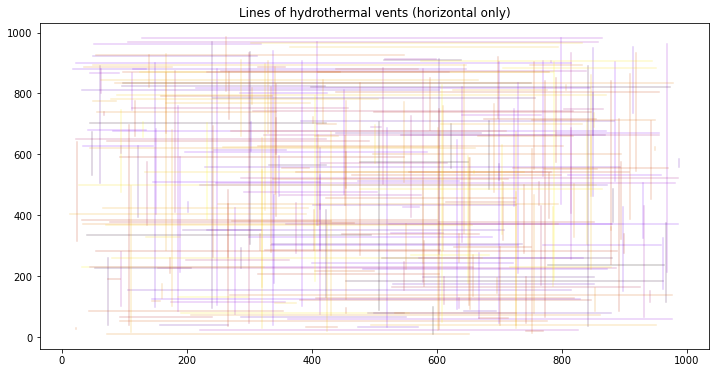

In [269]:
n_seg_hori = (start_points - end_points == 0).sum(axis=1).astype('bool').sum()

start_hori = start_points[(start_points - end_points == 0).sum(axis=1).astype('bool')]
end_hori = end_points[(start_points - end_points == 0).sum(axis=1).astype('bool')]

cmap = cm.get_cmap('gnuplot', n_seg_hori)

if isinstance(cmap, LinearSegmentedColormap):
    list_colors = cmap(range(500))
elif isinstance(cmap, ListedColormap):
    list_colors = cmap.colors

fig, ax = plt.subplots(figsize=(12, 6))

for n_segment in range(n_seg_hori):
    x1, y1 = start_hori[n_segment]
    x2, y2 = end_hori[n_segment]
    ax.plot([x1, x2], [y1, y2], color=list_colors[n_segment], alpha = 0.2)
    
ax.set_title("Lines of hydrothermal vents (horizontal only)")    

plt.show()

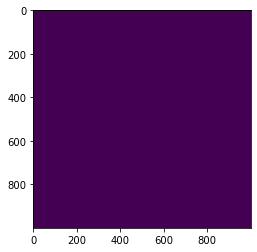

In [274]:
# using a 1000x1000 grid

hydrothermal_grid = np.zeros((1000, 1000))

plt.imshow(hydrothermal_grid)
plt.show()

In [278]:
 ((x1, y1), (x2, y2)) = ((6,4),(2,0))

In [280]:
np.arange(x1, x2, -1)

array([6, 5, 4, 3])